<a href="https://colab.research.google.com/github/DaniSumaili/7048CEM/blob/main/Clustering_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all the libraries that we shall be using
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans

from sklearn.metrics import matthews_corrcoef,cohen_kappa_score, mean_absolute_error,mean_squared_error 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
breastdata = pd.read_csv('/content/drive/My Drive/BreastCancer/Breast_GSE45827.csv')
breastdata.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,7.317273,6.941792,4.753893,9.689422,9.529578,4.416768,4.061347,6.468291,8.671009,3.766666,3.711459,5.076329,4.442042,6.741298,5.627442,5.516712,8.107136,4.956239,5.791279,3.569233,5.687476,4.152096,4.906925,8.206707,4.463950,5.186044,5.942088,4.191142,...,9.015007,12.050521,14.750905,13.359472,5.576968,3.606041,4.481027,5.509117,10.544533,11.200692,5.932332,4.253946,5.052679,7.782348,7.056759,7.787824,4.784976,3.943038,3.903069,6.119248,4.461984,4.752744,6.761262,5.298281,6.048960,8.292124,8.225293,8.333853,9.854639,9.823275,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,8.768129,7.567034,4.859823,8.459354,8.973671,4.503730,5.390424,6.756707,8.105795,4.651541,3.935309,5.228763,4.454780,6.468014,5.798596,5.306064,7.505800,4.636866,5.898319,3.749061,5.582313,4.449042,5.871074,7.242601,3.938327,4.378953,6.294126,4.058221,...,9.371174,8.264719,9.938357,9.507651,6.103962,3.983087,4.742306,5.424172,8.881772,11.148811,6.330691,4.755615,5.474167,8.542725,7.617779,8.237535,5.209694,3.939264,4.553344,6.017351,5.425393,4.957182,7.405313,5.615380,6.617585,8.225366,8.409790,8.499343,10.061910,9.796947,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,7.945085,7.238284,4.872635,9.367521,9.133688,4.358608,4.445164,5.476936,8.752115,3.546838,4.263868,5.509159,4.624205,7.103216,6.641263,5.141131,7.072525,4.728196,6.233648,3.766725,6.008163,4.191390,5.717077,7.809222,4.108028,5.012451,7.258626,4.330997,...,8.842430,10.241912,13.605901,11.784269,5.853014,3.748889,4.407490,5.919699,9.687444,11.601339,6.040000,4.314678,5.274790,8.030696,7.082369,7.912491,4.725483,4.036020,4.141341,5.825904,5.032693,4.764559,7.026349,5.448507,6.386042,8.218749,8.209361,8.280136,9.699647,9.452066,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,7.754670,7.078843,4.867320,7.790225,7.206228,4.680283,4.171577,5.985232,7.205984,3.568459,3.310109,5.166409,4.160049,6.730255,5.774961,6.092539,7.164589,4.903609,5.726683,3.532517,5.652934,3.997426,6.151148,7.189197,4.329053,5.134634,6.300199,4.192591,...,10.554449,9.191622,12.146083,11.018158,5.972863,3.658838,4.657377,5.508931,9.262102,11.338670,6.194179,4.300024,5.072087,8.148625,7.548858,7.960282,5.226375,3.562438,4.306947,5.979139,5.018239,4.872679,7.066764,5.573531,6.637775,8.183538,8.307374,8.233631,9.911691,9.611842,

In [ ]:
bc = breastdata.copy()

In [ ]:
#bc.head()

In [ ]:
data = bc.iloc[:,2:].values
data 

array([[ 9.85003997,  8.09792735,  6.42472816, ...,  2.9666567 ,
         3.50849465,  3.30199869],
       [ 9.86135737,  8.21222225,  7.06259284, ...,  2.9347635 ,
         3.68766637,  3.06429903],
       [10.1034785 ,  8.93613685,  5.73596977, ...,  2.84768393,
         3.55059675,  3.15853522],
       ...,
       [11.02709803,  7.18087582,  6.30473602, ...,  3.0851274 ,
         3.62884807,  3.21580734],
       [10.44439499,  7.5251525 ,  5.9644598 , ...,  3.01852519,
         3.77059745,  3.10229782],
       [11.34581728,  7.3792993 ,  5.89117177, ...,  3.06158533,
         3.85752548,  3.12982746]])

In [ ]:
#change the type(target class) column into category 
#bc["type"] = bc["type"].astype('category')
#bc.dtypes

In [ ]:
#bc["type_cat"] = bc["type"].cat.codes

In [ ]:
# assign labels to variable y
y = bc['type']
y

0          basal
1          basal
2          basal
3          basal
4          basal
         ...    
146    luminal_B
147    luminal_B
148    luminal_B
149    luminal_B
150    luminal_B
Name: type, Length: 151, dtype: object

**K-means**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from scipy.cluster.vq import kmeans,vq,whiten,kmeans2

Normalize a group of observations on a per feature basis. Before running K-Means, it is beneficial to rescale each feature dimension of the observation set with whitening. Each feature is divided by its standard deviation across all observations to give it unit variance.

In [ ]:
# whitening of data
data_kms = whiten(data)

Compute K-Means with Six Clusters

In [ ]:
# computing K-Means with K = 6 (6 clusters)
centroids,_ = kmeans2(data_kms, 6)

The above code performs K-Means on a set of observation vectors forming K clusters. The K-Means algorithm adjusts the centroids until sufficient progress cannot be made, i.e. the change in distortion, since the last iteration is less than some threshold. Here, we can observe the centroid of the cluster by printing the centroids variable using the code given below.

In [ ]:
print(centroids)

[[16.77364321 11.1998472   9.9065379  ... 31.05101997 25.04195358
  30.69811087]
 [16.35185384  9.79290747  9.54542332 ... 30.88947215 24.77342806
  32.50146581]
 [16.46609191 11.00593702 10.00109072 ... 31.23206711 24.3157043
  31.59968815]
 [16.20001301 12.50983723  8.21759294 ... 32.85163233 26.52125528
  32.15023526]
 [16.82849799  9.11091354  8.7764509  ... 31.3795906  24.66971489
  31.41169949]
 [17.47499297 10.25553594  9.80202012 ... 31.55001372 25.02106352
  31.23393194]]


Assign each value to a cluster by using the code given below.

The vq function compares each observation vector in the ‘M’ by ‘N’ obs array with the centroids and assigns the observation to the closest cluster. It returns the cluster of each observation and the distortion. We can check the distortion as well. Let us check the cluster of each observation using the following code.


In [ ]:
# assign each sample to a cluster
clx,_ = vq(data_kms,centroids)


In [ ]:
# check clusters of observation
print(clx)

[2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 5 0 0 0 0 0 0 0 2 0 0 0 5 0 0 0 5 0 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 5 4 4 4 4 4 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 2 2 1
 5 5 5 5 5 2 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 2 2 5 5 5 5 5
 5 5 5]


In [ ]:
## creating a new dataframe only for clx and converting it into categorical variable
df_labels_km2 = pd.DataFrame(clx , columns = list(['label']))

df_labels_km2['label'] = df_labels_km2['label'].astype('category')

In [ ]:
## Joining the label dataframe with the original data frame. 
df_labels_km2 = bc.join(df_labels_km2)
df_labels_km2.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,label
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,7.317273,6.941792,4.753893,9.689422,9.529578,4.416768,4.061347,6.468291,8.671009,3.766666,3.711459,5.076329,4.442042,6.741298,5.627442,5.516712,8.107136,4.956239,5.791279,3.569233,5.687476,4.152096,4.906925,8.206707,4.463950,5.186044,5.942088,4.191142,...,12.050521,14.750905,13.359472,5.576968,3.606041,4.481027,5.509117,10.544533,11.200692,5.932332,4.253946,5.052679,7.782348,7.056759,7.787824,4.784976,3.943038,3.903069,6.119248,4.461984,4.752744,6.761262,5.298281,6.048960,8.292124,8.225293,8.333853,9.854639,9.823275,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999,2
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,8.768129,7.567034,4.859823,8.459354,8.973671,4.503730,5.390424,6.756707,8.105795,4.651541,3.935309,5.228763,4.454780,6.468014,5.798596,5.306064,7.505800,4.636866,5.898319,3.749061,5.582313,4.449042,5.871074,7.242601,3.938327,4.378953,6.294126,4.058221,...,8.264719,9.938357,9.507651,6.103962,3.983087,4.742306,5.424172,8.881772,11.148811,6.330691,4.755615,5.474167,8.542725,7.617779,8.237535,5.209694,3.939264,4.553344,6.017351,5.425393,4.957182,7.405313,5.615380,6.617585,8.225366,8.409790,8.499343,10.061910,9.796947,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299,2
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,7.945085,7.238284,4.872635,9.367521,9.133688,4.358608,4.445164,5.476936,8.752115,3.546838,4.263868,5.509159,4.624205,7.103216,6.641263,5.141131,7.072525,4.728196,6.233648,3.766725,6.008163,4.191390,5.717077,7.809222,4.108028,5.012451,7.258626,4.330997,...,10.241912,13.605901,11.784269,5.853014,3.748889,4.407490,5.919699,9.687444,11.601339,6.040000,4.314678,5.274790,8.030696,7.082369,7.912491,4.725483,4.036020,4.141341,5.825904,5.032693,4.764559,7.026349,5.448507,6.386042,8.218749,8.209361,8.280136,9.699647,9.452066,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535,2
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,7.754670,7.078843,4.867320,7.790225,7.206228,4.680283,4.171577,5.985232,7.205984,3.568459,3.310109,5.166409,4.160049,6.730255,5.774961,6.092539,7.164589,4.903609,5.726683,3.532517,5.652934,3.997426,6.151148,7.189197,4.329053,5.134634,6.300199,4.192591,...,9.191622,12.146083,11.018158,5.972863,3.658838,4.657377,5.508931,9.262102,11.338670,6.194179,4.300024,5.072087,8.148625,7.548858,7.960282,5.226375,3.562438,4.306947,5.979139,5.018239,4.872679,7.066764,5.573531,6.637775,8.183538,8.307374,8.233631,9.911691,9.611842,12.111235,11.719215,13.743108,13.508861,6.610284,5.19

In [ ]:
df_labels_km2['label'].value_counts()

5    54
0    45
2    30
3    14
4     7
1     1
Name: label, dtype: int64

**Evaluate k-means Clustering**

In [ ]:
#print('Distortion: %.2f' % kmeans.inertia_)

Calculation of accuracy score. Since the k-means algorithm doesn´t have any knowledge on the true cluster labels, the permutations need to be found before comparing to the true labels.

In [ ]:
def find_permutation(n_clusters, real_labels, labels):
  permutation=[]
  for i in range(n_clusters):
    idx = labels == i
    new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
    permutation.append(new_label)
  return permutation

In [ ]:
permutation_km2 = find_permutation(6, y, clx)
print(permutation_km2)

['basal', 'luminal_A', 'HER', 'cell_line', 'normal', 'luminal_B']


In [ ]:
new_labels_km2 = [ permutation_km2[label] for label in clx]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels_km2))

Accuracy score is 0.5894039735099338


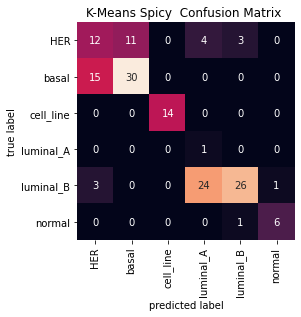

In [ ]:
## plot confusion matrix
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal']
mat_km2 = confusion_matrix(y, new_labels_km2)
sns.heatmap(mat_km2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label,
            yticklabels=label
            )
plt.title("K-Means Spicy  Confusion Matrix ")
plt.xlabel('predicted label')
plt.ylabel('true label');
#plt.savefig('confustion_matrix_1')

In [ ]:
print("\033[1m"  +'      ' +  ' K-Means spicy Model 2'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, new_labels_km2, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, new_labels_km2,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , new_labels_km2)))
#print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , new_labels_KMeans,)))# multioutput= 'uniform_average'
#print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , new_labels_KMeans, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, new_labels_km2)))
print("Accuracy =% 0.2f " % (accuracy_score(y, new_labels_km2)))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y, new_labels_km2, target_names=permutation_km2 ))

       K-Means spicy Model 2
                                                          
Correctly Classified Instances = 89.
Percentage of Correctly Classified Instances = 0.59.
Kappa statistic= 0.48.
Matthews Corrcoef = 0.50.
Accuracy = 0.59 
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

       basal       0.40      0.40      0.40        30
   luminal_A       0.67      0.73      0.70        41
         HER       1.00      1.00      1.00        14
   cell_line       1.00      0.03      0.07        29
      normal       0.48      0.87      0.62        30
   luminal_B       0.86      0.86      0.86         7

    accuracy                           0.59       151
   macro avg       0.73      0.65      0.61       151
weighted avg       0.68      0.59      0.54       151



**TSNE**

**Accuracy didnt improve will try apply t-SNE to the original data**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(random_state = 0)

In [ ]:
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=0, verbose=0)

In [ ]:
tsne_result = tsne.fit_transform(data)

In [ ]:
km_tsne = KMeans(n_clusters= 6, random_state= 0)

In [ ]:
km_tsne

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
#Predict the cluster labels
labels_tsne =km_tsne.fit_predict(tsne_result)

In [ ]:
labels_tsne.shape

(151,)

In [ ]:
labels_tsne

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 0, 4, 3, 4, 4, 4, 0, 4, 1, 4, 4, 4, 3, 4, 4, 3, 3],
      dtype=int32)

In [ ]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels_tsne = pd.DataFrame(km_tsne.labels_, columns= list(['label']))
df_labels_tsne['label'] =df_labels_tsne['label'].astype('category')
df_labels_tsne.head()

,label
0,2
1,2
2,2
3,2
4,2


In [ ]:
df_labels_tsne['label'].value_counts()

2    38
1    34
3    30
4    22
5    14
0    13
Name: label, dtype: int64

In [ ]:
permutation_tsne = find_permutation(6, y, km_tsne.labels_)
print(permutation_tsne)

['normal', 'HER', 'basal', 'luminal_A', 'luminal_B', 'cell_line']


In [ ]:
new_labels_tsne = [permutation_tsne[label] for label in km_tsne.labels_]
print("Accuracy score is", accuracy_score(y, new_labels_tsne))

Accuracy score is 0.8675496688741722


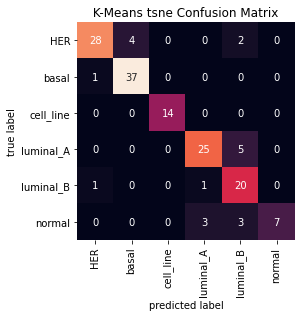

In [ ]:
# plot confusion matrix
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal']
mat_tsne = confusion_matrix(y, new_labels_tsne)
sns.heatmap(mat_tsne.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label,
            yticklabels=label
            )
plt.title(" K-Means tsne Confusion Matrix ")
plt.xlabel('predicted label')
plt.ylabel('true label');
#plt.savefig('confustion_matrix_2')

In [ ]:
print("\033[1m"  +'      ' +  ' K-Means TSNE Model 3'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, new_labels_tsne, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, new_labels_tsne,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , new_labels_tsne)))
#print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , new_labels_KMeans,)))# multioutput= 'uniform_average'
#print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , new_labels_KMeans, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, new_labels_tsne)))
print("Accuracy =% 0.2f " % (accuracy_score(y, new_labels_tsne)))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y, new_labels_tsne, target_names=label ))

       K-Means TSNE Model 3
                                                          
Correctly Classified Instances = 131.
Percentage of Correctly Classified Instances = 0.87.
Kappa statistic= 0.84.
Matthews Corrcoef = 0.84.
Accuracy = 0.87 
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

         HER       0.82      0.93      0.87        30
       basal       0.97      0.90      0.94        41
   cell_line       1.00      1.00      1.00        14
   luminal_A       0.83      0.86      0.85        29
   luminal_B       0.91      0.67      0.77        30
      normal       0.54      1.00      0.70         7

    accuracy                           0.87       151
   macro avg       0.85      0.89      0.85       151
weighted avg       0.89      0.87      0.87       151



**Hierarchical clustering**

In [ ]:
# for hierarchical clusterization
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.spatial.distance import  pdist
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

**Preprocessing**

In [ ]:
col = bc.columns[2:]
col

Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=col)
data_scaled.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,...,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0.006955,0.005717,0.004536,0.005192,0.002139,0.004858,0.003505,0.003112,0.006263,0.002315,0.005166,0.004901,0.003356,0.006841,0.006728,0.003118,0.002867,0.004567,0.006122,0.002659,0.002620,0.003584,0.003136,0.004760,0.003973,0.003895,0.005724,0.003499,0.004089,0.002520,0.004016,0.002932,0.003464,0.005794,0.003152,0.003662,0.004195,0.002959,0.005234,0.002317,...,0.006365,0.008508,0.010415,0.009432,0.003938,0.002546,0.003164,0.003890,0.007445,0.007908,0.004188,0.003003,0.003567,0.005495,0.004982,0.005499,0.003378,0.002784,0.002756,0.004320,0.003150,0.003356,0.004774,0.003741,0.004271,0.005855,0.005807,0.005884,0.006958,0.006936,0.008635,0.008369,0.009644,0.009516,0.004424,0.003542,0.003461,0.002095,0.002477,0.002331
1,0.006941,0.005780,0.004971,0.005409,0.002217,0.005308,0.003610,0.003227,0.005467,0.002526,0.006171,0.005326,0.003420,0.005954,0.006316,0.003170,0.003794,0.004755,0.005705,0.003274,0.002770,0.003680,0.003135,0.004552,0.004081,0.003734,0.005283,0.003263,0.004151,0.002639,0.003929,0.003131,0.004132,0.005097,0.002772,0.003082,0.004430,0.002856,0.004786,0.002114,...,0.006596,0.005817,0.006995,0.006692,0.004296,0.002803,0.003338,0.003818,0.006251,0.007847,0.004456,0.003347,0.003853,0.006012,0.005361,0.005798,0.003667,0.002772,0.003205,0.004235,0.003818,0.003489,0.005212,0.003952,0.004658,0.005789,0.005919,0.005982,0.007082,0.006895,0.008571,0.008312,0.009677,0.009480,0.004766,0.003724,0.003805,0.002066,0.002595,0.002157
2,0.007136,0.006312,0.004052,0.005430,0.002208,0.004635,0.003400,0.003126,0.006652,0.002509,0.005612,0.005113,0.003442,0.006617,0.006451,0.003079,0.003140,0.003869,0.006182,0.002505,0.003012,0.003891,0.003266,0.005017,0.004691,0.003631,0.004996,0.003340,0.004403,0.002661,0.004244,0.002961,0.004038,0.005516,0.002902,0.003540,0.005127,0.003059,0.004875,0.002848,...,0.006246,0.007234,0.009610,0.008324,0.004134,0.002648,0.003113,0.004181,0.006843,0.008194,0.004266,0.003048,0.003726,0.005672,0.005003,0.005589,0.003338,0.002851,0.002925,0.004115,0.003555,0.003365,0.004963,0.003848,0.004511,0.005805,0.005799,0.005849,0.006851,0.006676,0.008564,0.008282,0.009621,0.009391,0.004483,0.003653,0.003662,0.002011,0.002508,0.002231
3,0.006892,0.005197,0.004577,0.004935,0.002247,0.005512,0.003879,0.003227,0.006373,0.002340,0.005478,0.005000,0.003438,0.005503,0.005090,0.003306,0.002947,0.004228,0.005090,0.002521,0.002338,0.003650,0.002939,0.004754,0.004079,0.004304,0.005061,0.003464,0.004045,0.002495,0.003993,0.002824,0.004345,0.005078,0.003058,0.003627,0.004450,0.002962,0.005003,0.002295,...,0.007456,0.006493,0.008580,0.007783,0.004219,0.002585,0.003290,0.003891,0.006543,0.008010,0.004376,0.003038,0.003583,0.005756,0.005332,0.005623,0.003692,0.002516,0.003042,0.004224,0.003545,0.003442,0.004992,0.003937,0.004689,0.005781,0.005868,0.005816

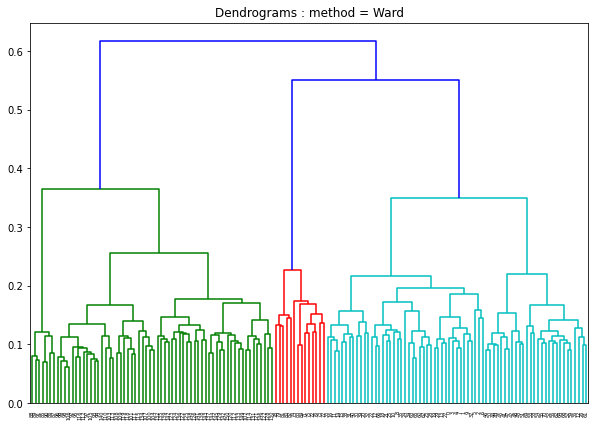

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms : method = Ward")
dend = shc.dendrogram(shc.linkage(data_scaled, method ='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 6, affinity= 'euclidean', linkage= 'ward')
pred_y_hc = cluster.fit_predict(data_scaled)
pred_y_hc

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 4,
       4, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 2, 5, 2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
cluster

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

In [ ]:
## creating a new dataframe only for pred_y_kms and converting it into categorical variable
df_labels_hc = pd.DataFrame(cluster.labels_ , columns = list(['label']))

df_labels_hc['label'] = df_labels_hc['label'].astype('category')

In [ ]:
# Joining the label dataframe with the original data frame. 
df_labels_hc = bc.join(df_labels_hc)
df_labels_hc.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,...,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,label
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,7.317273,6.941792,4.753893,9.689422,9.529578,4.416768,4.061347,6.468291,8.671009,3.766666,3.711459,5.076329,4.442042,6.741298,5.627442,5.516712,8.107136,4.956239,5.791279,3.569233,5.687476,4.152096,4.906925,8.206707,4.463950,5.186044,5.942088,4.191142,...,12.050521,14.750905,13.359472,5.576968,3.606041,4.481027,5.509117,10.544533,11.200692,5.932332,4.253946,5.052679,7.782348,7.056759,7.787824,4.784976,3.943038,3.903069,6.119248,4.461984,4.752744,6.761262,5.298281,6.048960,8.292124,8.225293,8.333853,9.854639,9.823275,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999,4
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,8.768129,7.567034,4.859823,8.459354,8.973671,4.503730,5.390424,6.756707,8.105795,4.651541,3.935309,5.228763,4.454780,6.468014,5.798596,5.306064,7.505800,4.636866,5.898319,3.749061,5.582313,4.449042,5.871074,7.242601,3.938327,4.378953,6.294126,4.058221,...,8.264719,9.938357,9.507651,6.103962,3.983087,4.742306,5.424172,8.881772,11.148811,6.330691,4.755615,5.474167,8.542725,7.617779,8.237535,5.209694,3.939264,4.553344,6.017351,5.425393,4.957182,7.405313,5.615380,6.617585,8.225366,8.409790,8.499343,10.061910,9.796947,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299,4
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,7.945085,7.238284,4.872635,9.367521,9.133688,4.358608,4.445164,5.476936,8.752115,3.546838,4.263868,5.509159,4.624205,7.103216,6.641263,5.141131,7.072525,4.728196,6.233648,3.766725,6.008163,4.191390,5.717077,7.809222,4.108028,5.012451,7.258626,4.330997,...,10.241912,13.605901,11.784269,5.853014,3.748889,4.407490,5.919699,9.687444,11.601339,6.040000,4.314678,5.274790,8.030696,7.082369,7.912491,4.725483,4.036020,4.141341,5.825904,5.032693,4.764559,7.026349,5.448507,6.386042,8.218749,8.209361,8.280136,9.699647,9.452066,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535,4
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,7.754670,7.078843,4.867320,7.790225,7.206228,4.680283,4.171577,5.985232,7.205984,3.568459,3.310109,5.166409,4.160049,6.730255,5.774961,6.092539,7.164589,4.903609,5.726683,3.532517,5.652934,3.997426,6.151148,7.189197,4.329053,5.134634,6.300199,4.192591,...,9.191622,12.146083,11.018158,5.972863,3.658838,4.657377,5.508931,9.262102,11.338670,6.194179,4.300024,5.072087,8.148625,7.548858,7.960282,5.226375,3.562438,4.306947,5.979139,5.018239,4.872679,7.066764,5.573531,6.637775,8.183538,8.307374,8.233631,9.911691,9.611842,12.111235,11.719215,13.743108,13.508861,6.610284,5.19

In [ ]:
permutation_hc = find_permutation(6, y, pred_y_hc)
print(permutation_hc)

['cell_line', 'HER', 'luminal_B', 'normal', 'basal', 'luminal_A']


In [ ]:
new_labels_hc = [ permutation_hc[label] for label in cluster.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y, new_labels_hc))

Accuracy score is 0.9072847682119205


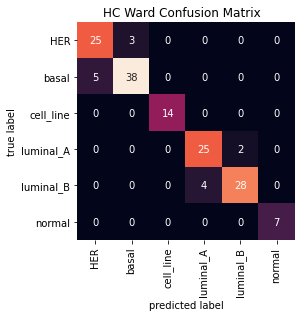

In [ ]:
# plot confusion matrix
label = [ 'HER','basal','cell_line', 'luminal_A','luminal_B','normal']
mat_hc = confusion_matrix(y, new_labels_hc)
sns.heatmap(mat_hc.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label,
            yticklabels=label
            )
plt.title("HC Ward Confusion Matrix  ")
plt.xlabel('predicted label')
plt.ylabel('true label');
#plt.savefig('confustion_matrix_2')

In [ ]:
print("\033[1m"  +'      ' +  ' HC Ward Model 2'  + "\033[0m"    )
print("                                                          ")
print("Correctly Classified Instances = {}.".format(accuracy_score(y, new_labels_hc, normalize=False)))
print("Percentage of Correctly Classified Instances = {:.2f}.".format(accuracy_score(y, new_labels_hc,)))
print('Kappa statistic= {:.2f}.'. format(cohen_kappa_score(y , new_labels_hc)))
#print('Mean absolute error = {:.2f}.'. format(mean_absolute_error(y , new_labels_HC, multioutput= 'uniform_average')))
#print('Root Mean Squared error = {:.2f}.'. format(mean_squared_error (y , new_labels_HC, squared=False)))
print('Matthews Corrcoef = {:.2f}.'. format(matthews_corrcoef(y, new_labels_hc)))
print("Accuracy =% 0.2f "% (accuracy_score(y, new_labels_hc)))
print("                                                          ")
print("\033[1m"  +'                 ' +  'Detailed Accuracy By Class' + "\033[0m" )
print(classification_report(y, new_labels_hc, target_names=label ))

       HC Ward Model 2
                                                          
Correctly Classified Instances = 137.
Percentage of Correctly Classified Instances = 0.91.
Kappa statistic= 0.88.
Matthews Corrcoef = 0.88.
Accuracy = 0.91 
                                                          
                 Detailed Accuracy By Class
              precision    recall  f1-score   support

         HER       0.89      0.83      0.86        30
       basal       0.88      0.93      0.90        41
   cell_line       1.00      1.00      1.00        14
   luminal_A       0.93      0.86      0.89        29
   luminal_B       0.88      0.93      0.90        30
      normal       1.00      1.00      1.00         7

    accuracy                           0.91       151
   macro avg       0.93      0.93      0.93       151
weighted avg       0.91      0.91      0.91       151



# **For presentation and report**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, matthews_corrcoef, precision_score, recall_score, roc_curve

In [ ]:
names = ["KMeans", "t-sne", "HC"]
pred = [new_labels_km2, new_labels_tsne, new_labels_hc]

model_cols = []
df = pd.DataFrame(columns = model_cols)
index = 0

for name, pred in zip(names, pred):
  df.loc[index,'Clusters'] = name
  df.loc[index,'Accuracy'] = accuracy_score(y, pred)
  df.loc[index, 'Precision'] = precision_score(y, pred, average='micro')
  df.loc[index,'Recall'] = recall_score(y, pred, average='micro')
  df.loc[index,'F1 Score'] = f1_score(y, pred, average='micro')
  df.loc[index,'MCC'] = matthews_corrcoef(y, pred)
  df.loc[index, 'Kappa'] = cohen_kappa_score(y , pred)
  

  index += 1

In [ ]:
print("\033[1m"  +'             ' +  ' Clustering Metric Evaluation scores v2'  + "\033[0m"    )
df

              Clustering Metric Evaluation scores v2


,Clusters,Accuracy,Precision,Recall,F1 Score,MCC,Kappa
0,KMeans,0.589404,0.589404,0.589404,0.589404,0.504082,0.484528
1,t-sne,0.867550,0.867550,0.867550,0.867550,0.838809,0.835923
2,HC,0.907285,0.907285,0.907285,0.907285,0.884300,0.883910


                 Clustering Metric Evaluation graph v2


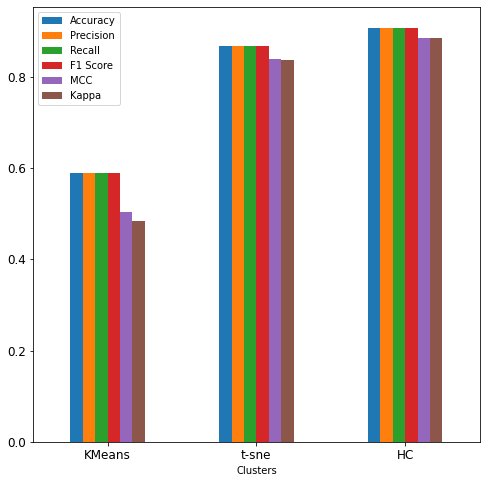

In [ ]:
df2 =df.copy()
print("\033[1m"  +'                ' +  ' Clustering Metric Evaluation graph v2'  + "\033[0m"    )
ax = df2.set_index('Clusters').plot.bar(rot=0,  figsize=(8,8), fontsize = 12)#title = 'Clustering',